#### Université Paul Sabatier  2018-2019, M1 CMI SID
# Outils Mathématiques pour l'ingénierie - TP1

- En tête pour charger les fonctions nécessaires au TP.

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from scipy.misc import *

## Question 1: Approximation de Taylor.

Pour $i \in \mathbb{N}^*$, notons ${\rm approx}_i \colon \mathbb{R} \to \mathbb{R}$, l'approximation de Taylor d'ordre $i$ de la fonction sinus autour de $0$. Notons pour tout $x \in \mathbb{R}$, l'erreur d'approximation, ${\rm err}_i(x) = |\sin(x) - {\rm approx}_i(x)|$.

Dessiner entre $-4$ et $4$ la fonction sinus et de différentes couleurs ${\rm approx}_i$ pour $i = 1, 3, 5, 7$. Utiliser l'option "label" de la fonction [plot](http://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) ainsi que [legend()](https://matplotlib.org/users/legend_guide.html). Commenter.

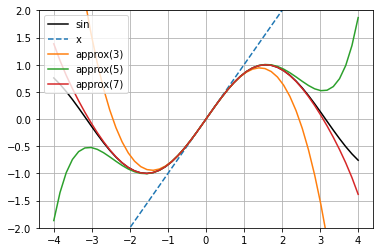

In [2]:
#Vecteur de x
x = linspace(-400,400) / 100; 
#Tracer les approximations
plot(x,sin(x), 'black', label = 'sin')
plot(x,x,'--' , label = 'x')
plot(x,x-x**3/factorial(3), label = 'approx(3)')
plot(x,x-(x**3/factorial(3))+(x**5/factorial(5)), label = 'approx(5)')
plot(x,x-(x**3/factorial(3))+(x**5/factorial(5))-(x**7/factorial(7)), label = 'approx(7)')

#Tronquer y
ylim((-2,+2))

#Ecrire la légende
legend()

#Tracer la grille
grid()

Dessiner l'erreur d'approximation ${\rm err}_i$ entre $-2$ et $2$ pour $i = 1, 3, 5, 7$. Commenter.

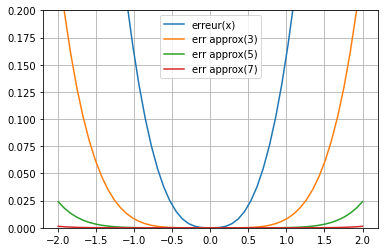

In [4]:
#Vecteur de x
x = linspace(-200,200) / 100; 

#Tracer l'erreur
plot(x,abs(sin(x) - (x)), label = 'erreur(x)')
plot(x,abs(sin(x) - (x-x**3/factorial(3))), label = 'err approx(3)')
plot(x,abs(sin(x) - (x-(x**3/factorial(3))+(x**5/factorial(5)))), label = 'err approx(5)')
plot(x,abs(sin(x) - (x-(x**3/factorial(3))+(x**5/factorial(5))-(x**7/factorial(7)))), label = 'err approx(7)')

#Tronquer l'axe de y
ylim((0,+0.2))

#Ecrire la légende
legend()

#Tracer la grille
grid()

Dessiner l'erreur d'approximation ${\rm err}_i$ pour $i = 1, 3, 5, 7$ en échelle log log entre 0 et 1 ( regarder [xscale](http://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xscale.html) et [yscale](http://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yscale.html) ) 

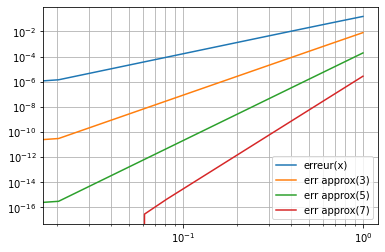

In [5]:
#Vecteur de x
x = linspace(0,100) / 100; 

#Tracer l'erreur
plot(x,abs(sin(x) - (x)), label = 'erreur(x)')
plot(x,abs(sin(x) - (x-x**3/factorial(3))), label = 'err approx(3)')
plot(x,abs(sin(x) - (x-(x**3/factorial(3))+(x**5/factorial(5)))), label = 'err approx(5)')
plot(x,abs(sin(x) - (x-(x**3/factorial(3))+(x**5/factorial(5))-(x**7/factorial(7)))), label = 'err approx(7)')

#Ecrire la légende
legend()

#Tracer la grille
grid(which='both')

#Echelle log
xscale('log')
yscale('log')

Pour $k = 10, \ldots, 100$, notons $x_k = \frac{k}{1000}$ et $y_{k} = {\rm err}_1(x_k)$. Calculer le coefficient de la droite de régression de $\log(y)$ sur $\log(x)$. Commenter. Même question pour les approximations d'ordre $3$ et $5$. Que se passe t'il à l'ordre 7?

In [7]:
#a = cov(x,y)/cov(x,x) --> cov(x,y) = E(x,y) - E(x)E(y) , var(x) = E(x**2) - (E(x))**2
#b = E(y) - a.E(x)

x = linspace(10,100) / 1000;
lx = log(x)
vx = mean(lx**2) - (mean(lx))**2

#à l'ordre 1
y_1 = abs(sin(x) - (x))
ly_1 = log(y_1)
cov_1 = mean(lx*ly_1) - mean(lx)*mean(ly_1)
a_1 = cov_1/vx
print(1,a_1)

#à l'ordre 3
y_3 = abs(sin(x) - (x-x**3/factorial(3)))
ly_3 = log(y_3)
cov_3 = mean(lx*ly_3) - mean(lx)*mean(ly_3)
a_3 = cov_3/vx
print(1,a_3)

#à l'ordre 5
y_5 = abs(sin(x) - (x-(x**3/factorial(3))+(x**5/factorial(5))))
ly_5 = log(y_5)
cov_5 = mean(lx*ly_5) - mean(lx)*mean(ly_5)
a_5 = cov_5/vx
print(1,a_5)

#à l'ordre 7
y_7 = abs(sin(x) - (x-(x**3/factorial(3))+(x**5/factorial(5))-(x**7/factorial(7))))
ly_7 = log(y_7)
cov_7 = mean(lx*ly_7) - mean(lx)*mean(ly_7)
a_7 = cov_7/vx
print(1,a_7)

1 2.9997829491518675
1 4.999896635794846
1 7.000151437724304
1 nan


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


## Question 2: Différentiation numérique.
Soit $f \colon \mathbb{R} \to \mathbb{R}$ une fonction différentiable. D'après la définition de la différentiabilité, nous savons que pour $a \in \mathbb{R}$ fixé et pour $h$ très petit, $\frac{f(a+h) - f(a)}{h} \simeq f'(a)$. Comment utiliser cela pour calculer une approximation numérique de la dérivée de la fonction sinus autour de $0$?

In [8]:
def derivSinOrdre(x):
    a = [1,3,6,9,12,15,18]
    for exp in a :
        h=10**-exp
        rep=(sin(x+h)-sin(x))/h
        print(rep)
derivSinOrdre(1)

0.4973637525353891
0.5398814803603269
0.5403018851213304
0.5403023584094058
0.5403455460850637
0.5551115123125783
0.0


## Question 3: Etude du comportement asymptotique d'une fonction.

En TD, nous avons vu que 
$$x^2\arctan\left(\frac{1}{1+x}\right)  \underset{x \to \infty}{=} x - 1 + \frac{3}{2x} + o\left( \frac{1}{x}\right)$$

Que cela implique-t-il pour les asymptotes du graphe de $f \colon x \mapsto x^2\arctan\left(\frac{1}{1+x}\right)$ en $+ \infty$ et $-\infty$. Représenter graphiquement $f$ ainsi que ses asymptotes.

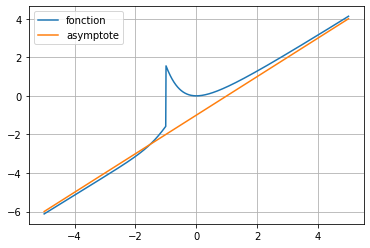

In [2]:
x = linspace(-5, +5, 1000)
y = (x**2)*(arctan(1/(1+x)))
y_approx = x - 1
plot(x, y, label = "fonction")
plot(x, y_approx, label = "asymptote")
grid()
legend()

Vérifier que la différence entre la valeur de $f$ et ses asymptotes est bien de l'ordre prédit par le développement limité.

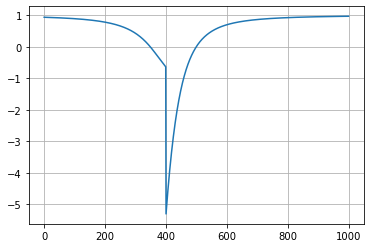

In [3]:
#x = linspace(-10, 10, 1000)
err = y - y_approx
err_th = 2/(3*x)
plot(err/err_th)
grid()

## Question 4: Résolution d'équation par bissection.
Il est connu depuis le Ve siècle avant J.C. que $\sqrt{2}$ est irrationnel. Qu'est ce que cela signifie? Pouvez vous le démontrer? Qu'est ce que cela implique pour l'évaluation numérique de $\sqrt{2}$ par un ordinateur classique?

Soit $f\colon [0,2] \mapsto \mathbb{R}$, une fonction continue telle que $f(0) < 0$ et $f(2)>0$. Dans ce cas il existe un point $\bar{x} \in [0,2]$ tel que $f(\bar{x}) = 0$ (c'est le [théorème des valeurs intermédiaires](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_des_valeurs_interm%C3%A9diaires)). Cela suggère une méthode pour approximer $\bar{x}$ dite [méthode de la bissection](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_dichotomie). On choisit $x_0 = 0$, $y_0 = 2$ et on itère de manière récursive.
$$\text{si } f\left(\frac{x_k+y_k}{2}\right) > 0, \text{ alors }, x_{k+1} = x_k \text{ et } y_{k+1} = \frac{x_k+y_k}{2}$$
$$\text{sinon } x_{k+1} = \frac{x_k+y_k}{2} \text{ et } y_{k+1} = x_k$$

Pour $k \in \mathbb{N}$, $[x_k, y_k]$ est de largeur $2^{-k + 1}$ et contient une solution de l'équation $f(x) = 0$. Écrire une fonction qui pour $\epsilon > 0$ donné calcule une approximation de $\sqrt{2}$ Ã  $\epsilon$ près.

In [ ]:
def f(x):
    return x**2-2

def approxSqrtTwo(epsilon):
    N = 1 + int(ceil(-log(epsilon)/log(2)))
    x = 0
    y = 2
    for i in range(N):
        z = (x+y)/2
        if f(z)>0:
            y = z 
        else :
            x = z
    return x 

print(approxSqrtTwo(10**(-3)), approxSqrtTwo(10**(-3)) - sqrt(2))
print(approxSqrtTwo(10**(-6)), approxSqrtTwo(10**(-3)) - sqrt(2))

## Question 5: Résolution d'équation par la méthode de Newton.

La [méthode de Newton](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_Newton) se base sur l'idée que $f(x) \simeq f(a) + f'(a) (x - a)$ pour $x$ proche de $a$. Cela suggère la méthode de résolution de l'équation $f(x) = 0$ en choisissant $x_0 \in \mathbb{R}$ et en choisissant de manière récursive $x_{k+1}$ tel que
$$f(x_k) + f'(x_k) (x_{k+1} - x_k) = 0$$
Écrire une fonction qui prend comme argument un nombre d'itération $N$ et applique $N$ itération de la méthode de Newton pour résoudre numériquement l'équation $x^2 - 2 = 0$. La fonction renvoie un tableau de longueur $N$ qui contient la valeur de $x_k$, l'itéré $k$ de la méthode de Newton.

In [3]:
def f(x):
    return x**2 - 2

def df(x):
    return 2*x

def newtonN(N):
    x = 1
    X = []
    X = X + [x]
    for n in range(N):
        x = x - f(x)/df(x)
        X = X + [x]
    return(X)
        
print(newtonN(10))

[1, 1.5, 1.4166666666666667, 1.4142156862745099, 1.4142135623746899, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095]


Comparer graphiquement les valeurs de $|x_k^2 - 2|$ et $|\tilde{x}_k^2 - 2|$ où $x_k$ est donné par la méthode de Newton et $\tilde{x}_k$ est donné par la méthode de la bissection pour $k = 1, \ldots, 10$.

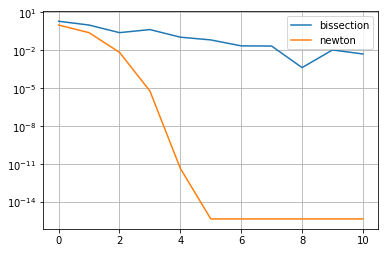

In [8]:
def bissectionN(N):
    x = 0
    y = 2
    X = [x]
    for i in range(N):
        z = (x+y)/2
        if f(z)>0:
            y = z 
        else :
            x = z
        X = X + [z]
    return X

x_bissec = array(bissectionN(10))
x_newton = array(newtonN(10))
err_bissec = abs(x_bissec**2 - 2)
err_newton = abs(x_newton**2 - 2)
plot(err_bissec, label="bissection")
plot(err_newton, label="newton")
yscale('log')
grid(which = 'both')
legend()

On parle de convergence linéaire pour la méthode de la bissection et de convergence quadratique pour la méthode de Newton. Expliquer ces termes.